# Keras

Keras is a very high-level deep learning library. Open source, MIT licensed and the main developer is an employee of Google (of course).

Thankfully it seems to be relatively untouched by Google and does have support for CNTK (Microsoft), Theano (academia) as well as Tensorflow. So no Caffee. I also here through my grapevine that MXNet support is in the works.

It's great because it's so high-level, you don't get bogged down with the implementation. Just the architecture.

But obviously, once you have honed in on an architecture, then you might want to export the model to a dedicated framework.

Let's go!

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [28]:
h = 0.025
colours = np.array(["r", "b", "g", "k", "c", "m"])
def plot_decision(ax, clf, X, y):
    cmap = ListedColormap(colours[:len(np.unique(y))])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plot_points(ax, X, y):
    ax.plot
    ax.scatter(X[:, 0], X[:, 1], c=colours[y])

Below we're going to create a model that mimics `sklearn`'s MLPClassifier (almost). It is a little complicated because of the need for the custom initialisation (zeros are rarely the best option). And we need to use a non-standard Adam learning rate to match that of our `sklearn` parameters.

In [24]:
# Generate dummy data
x_train, y_train = datasets.make_moons(noise=0, random_state=42)
sclr = StandardScaler().fit(x_train)
x_train = sclr.transform(x_train)

x_test, y_test = datasets.make_moons(noise=0, random_state=420)
x_test = sclr.transform(x_train)


# Create the model
model = Sequential()

# Create special intialisation (to be the same as sklearn)
initialisation=glorot_uniform()

# Add hidden layer
model.add(Dense(3, input_dim=2, bias_initializer=initialisation))

# Add activation
model.add(Activation('tanh'))

# Add output layer
model.add(Dense(1, bias_initializer=initialisation))

# Add activation
model.add(Activation('sigmoid'))

# Create optimiser
adam = Adam(lr=0.05)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=adam)

# Fit the model
history = model.fit(x_train, y_train, epochs=200, verbose=0, shuffle=True)

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names[0], ":", score)

loss : 4.67181648664


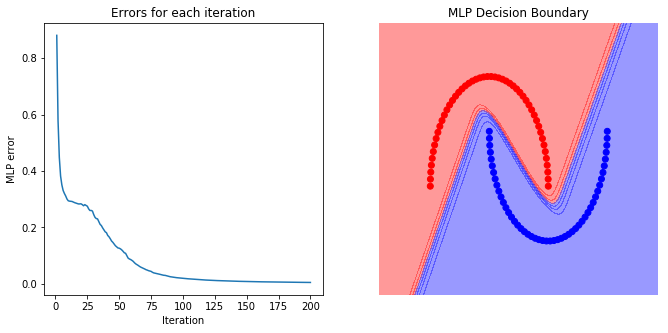

In [26]:
fig, axarr = plt.subplots(1, 2, figsize=(11, 5))
ax = axarr[0]
ax.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
ax.set_title("Errors for each iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("MLP error")

ax = axarr[1]
plot_decision(ax, model, x_train, y_train)
plot_points(ax, x_train, y_train)
ax.set_axis_off()
ax.set_title("MLP Decision Boundary")
plt.show()

So there we have it. Now it's your turn. Copy (or edit) the code above and try and create your own model. Can you do any better?

## Tasks:

- Create your own keras model.
- Play with the various parameters.
- Investigate other initialisations
- Investigate other activations. What is best for this problem?
- Add nodes. Remove nodes. What happens?